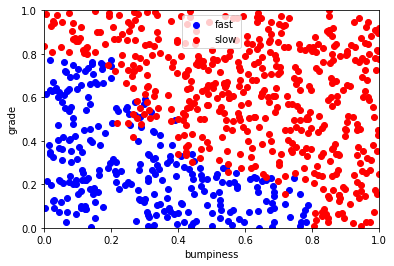

In [1]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually

grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]

bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]
#### initial visualization

plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")

plt.show()
################################################################################
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


In [2]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')
nbrs.fit(features_train)
nbrs.kneighbors_graph(features_train).toarray()


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [3]:
prettyPicture(nbrs, features_test, labels_test)


AttributeError: 'NearestNeighbors' object has no attribute 'predict'

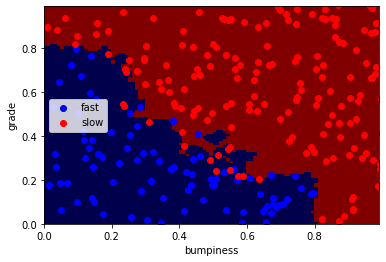

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(features_train,labels_train)
clf=clf_knn

try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass


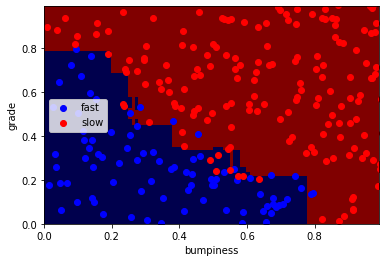

In [7]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada= AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(features_train,labels_train)
prettyPicture(clf_ada, features_test, labels_test)


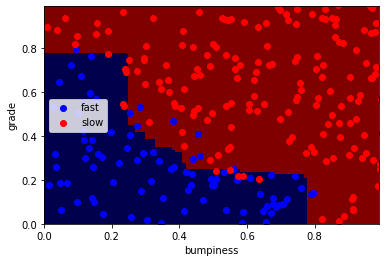

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(features_train,labels_train)
prettyPicture(clf_rf, features_test, labels_test)


In [10]:
from sklearn.metrics import accuracy_score
print("KNN",accuracy_score(labels_test, clf_knn.predict(features_test)))
print("ADA",accuracy_score(labels_test, clf_ada.predict(features_test)))
print("RF",accuracy_score(labels_test, clf_rf.predict(features_test)))


KNN 0.928
ADA 0.924
RF 0.92


In [12]:
print(np.shape(features_train))


NameError: name 'np' is not defined

In [13]:
import numpy as np
print(np.shape(features_train))


(750, 2)


In [15]:
import tensorflow as tf 
import numpy as np

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [16]:
r = model.fit(features_train, labels_train, validation_data=(features_test, labels_test), epochs=100)


Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 3s 4ms/sample - loss: 0.8133 - accuracy: 0.3360 - val_loss: 0.8057 - val_accuracy: 0.3400
Epoch 2/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7997 - accuracy: 0.3440 - val_loss: 0.7910 - val_accuracy: 0.3360
Epoch 3/100
750/750 [==============================] - 0s 253us/sample - loss: 0.7873 - accuracy: 0.3440 - val_loss: 0.7770 - val_accuracy: 0.3440
Epoch 4/100
750/750 [==============================] - 0s 221us/sample - loss: 0.7755 - accuracy: 0.3520 - val_loss: 0.7640 - val_accuracy: 0.3720
Epoch 5/100
750/750 [==============================] - 0s 229us/sample - loss: 0.7646 - accuracy: 0.3547 - val_loss: 0.7518 - val_accuracy: 0.3920
Epoch 6/100
750/750 [==============================] - 0s 217us/sample - loss: 0.7545 - accuracy: 0.3747 - val_loss: 0.7403 - val_accuracy: 0.3960
Epoch 7/100
750/750 [==============================] - 0s 226us/sample - los

In [17]:
import tensorflow as tf 
import numpy as np

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(10, activation='sigmoid')
])


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [22]:
import tensorflow as tf 
import numpy as np

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(2,)),
  tf.keras.layers.Dense(10, activation='sigmoid'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [23]:
r = model.fit(features_train, labels_train, validation_data=(features_test, labels_test), epochs=100)


Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.6904 - accuracy: 0.5387 - val_loss: 0.6738 - val_accuracy: 0.7400
Epoch 2/100
750/750 [==============================] - 0s 274us/sample - loss: 0.6687 - accuracy: 0.6453 - val_loss: 0.6520 - val_accuracy: 0.6640
Epoch 3/100
750/750 [==============================] - 0s 299us/sample - loss: 0.6528 - accuracy: 0.6413 - val_loss: 0.6387 - val_accuracy: 0.6640
Epoch 4/100
750/750 [==============================] - 0s 233us/sample - loss: 0.6435 - accuracy: 0.6413 - val_loss: 0.6288 - val_accuracy: 0.6640
Epoch 5/100
750/750 [==============================] - 0s 231us/sample - loss: 0.6375 - accuracy: 0.6413 - val_loss: 0.6222 - val_accuracy: 0.6640
Epoch 6/100
750/750 [==============================] - 0s 284us/sample - loss: 0.6333 - accuracy: 0.6413 - val_loss: 0.6177 - val_accuracy: 0.6640
Epoch 7/100
750/750 [==============================] - 0s 254us/sample - l

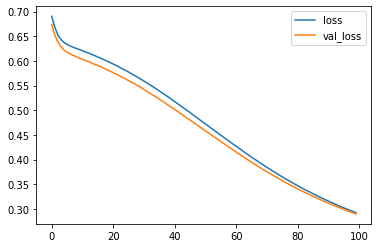

In [24]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


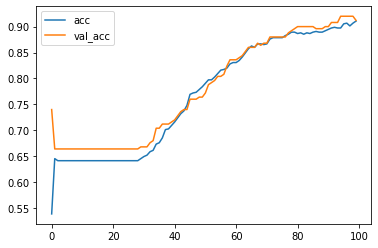

In [25]:
# Plot the accuracy too

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


In [30]:
pred=model.predict(features_test)
pred = np.round(pred).flatten()
print(accuracy_score(labels_test,pred))


0.912


In [32]:
print("Evaluate output:", model.evaluate(features_test, labels_test))


250/250 [==============================] - 0s 1ms/sample - loss: 0.2898 - accuracy: 0.9120
Evaluate output: [0.28983869910240173, 0.912]
